In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import pickle
from RMAB import *
from ThompsonSamplingDE import TSDE

%matplotlib inline

True p
[[ 0.9  0.5]
 [ 0.9  0.2]
 [ 0.9  0.5]
 [ 0.5  0.8]
 [ 0.8  0.7]
 [ 0.7  0.2]
 [ 0.5  0.3]
 [ 0.5  0.8]]

Estimating the value of whittle...
Value(whittle) =  2.2887

Running TS...
Average rewards of TS =  2.2801

Maximal weights
[0.9, 0.5] 1.0
[0.9, 0.2] 1.0
[0.9, 0.5] 0.93
[0.5, 0.8] 0.97
[0.8, 0.7] 1.0
[0.5, 0.2] 0.13
[0.4, 0.4] 0.06
[0.5, 0.8] 1.0



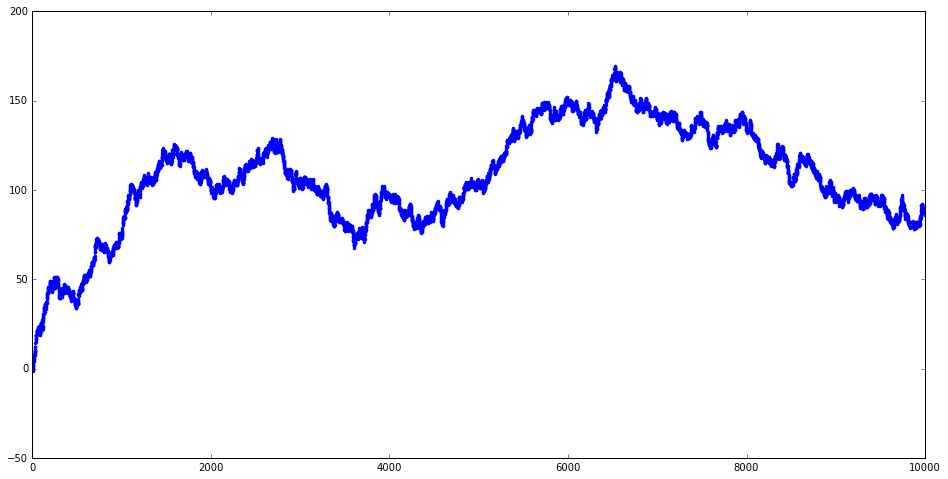

In [3]:
K = 8
N = 3
M = 100 # size of MCMC iterations
LM = 100
L = 10000
baseline = 'whittle'

supp = np.linspace(0.1, 0.9, 9)
len_supp = len(supp)
posterior = np.ones((K, len_supp**2)) / len_supp**2


# Draw true p
p = np.random.choice(supp, 2*K).reshape(K, 2)
w = np.ones(K)

print "True p"
print p
print 

rmab = RestlessMAB(K)
rmab.initialize(p, w)
policy = TSDE(rmab, N)

# Estimate the value of WIP
print "Estimating the value of {0}...".format(baseline)
value_baseline = 0.0
for _ in xrange(M):
    value_baseline += policy.run_baseline(p, w, LM, baseline) / float(LM*M)
print "Value({0}) = ".format(baseline), value_baseline
print 

print "Running TS..."
policy = TSDE(rmab, N, supp, posterior)
results = policy.runTS(L, baseline=baseline)
print "Average rewards of TS = ", np.average(results)
print 

print "Maximal weights"
policy.get_posterior_summary()
print

plt.figure(figsize=(16, 8))
plt.plot(range(L), (1 + np.arange(L)) * value_baseline - np.cumsum(results), '.-')